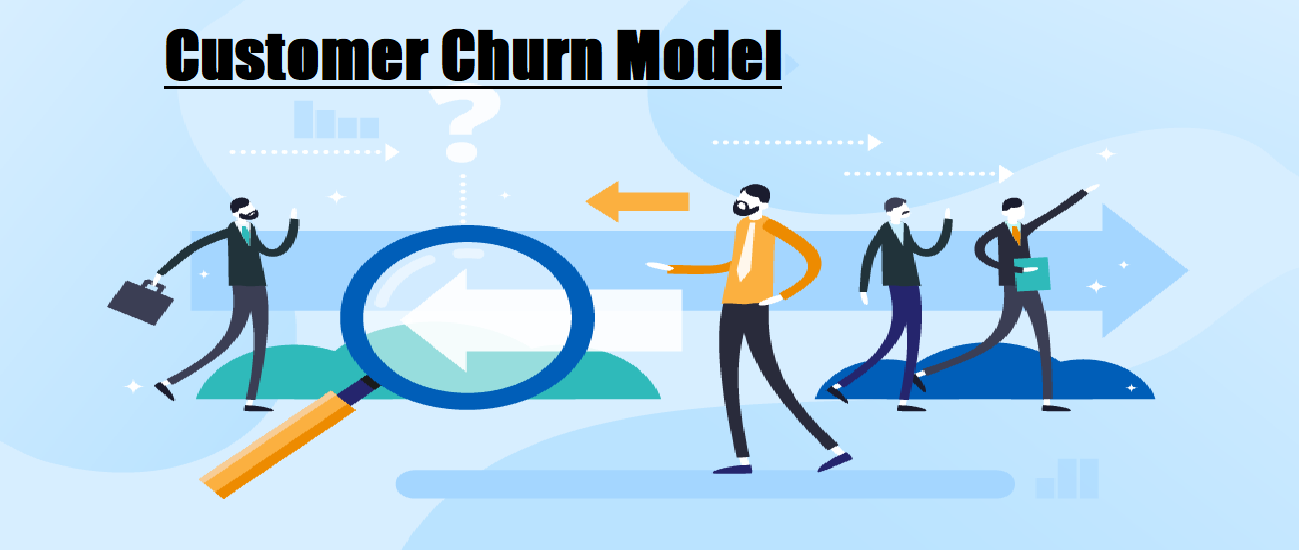

### Churn:
**Churn is the number of customers dosconnected their service over a given time period expressed as a percent of the the business's total customers.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.size

140000

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
#missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
#statistical measures
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


### Drop unwated columns

In [17]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Create Dummies for Geography & Gender columns

In [18]:
data=pd.get_dummies(df, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Seperate Dependent(y) & Independet(X) features

In [24]:
X=data.drop('Exited', axis=1)
y=data['Exited']

### Split Data into Train Test

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print("X train Shape :", x_train.shape)
print("X test Shape :", x_test.shape)
print("Y train Shape :", y_train.shape)
print("Y test Shape :", y_test.shape)

X train Shape : (8000, 11)
X test Shape : (2000, 11)
Y train Shape : (8000,)
Y test Shape : (2000,)


### Standardize the features

In [51]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std=std.fit(x_train)
x_train=std.transform(x_train)
x_test=std.transform(x_test)
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [52]:
x_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

### Create ANN model

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

### Create Input layer

In [54]:
model=Sequential()

In [55]:
model.add(Dense(units=6, activation='relu', kernel_initializer='uniform', input_dim=11))

### Create Hidden layers

In [56]:
model.add(Dense(units=6, activation='relu', kernel_initializer='uniform'))
#model.add(Dense(units=2, activation='relu', kernel_initializer='uniform'))

### Create Output layer

In [58]:
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

### Summery of Model

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 72        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit the model with training set for training

In [61]:
res=model.fit(x_train,y_train, batch_size=20, epochs=50)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6286 - accuracy: 0.7788
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7960
Epoch 3/50
400/400 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.7960
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.7960
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.7960
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.7960
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7960
Epoch 8/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.7960
Epoch 9/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7960
Epoch 10/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4134 - accuracy: 0.7960

### Model Keys

In [67]:
res.history.keys()

dict_keys(['loss', 'accuracy'])

### Accuracy

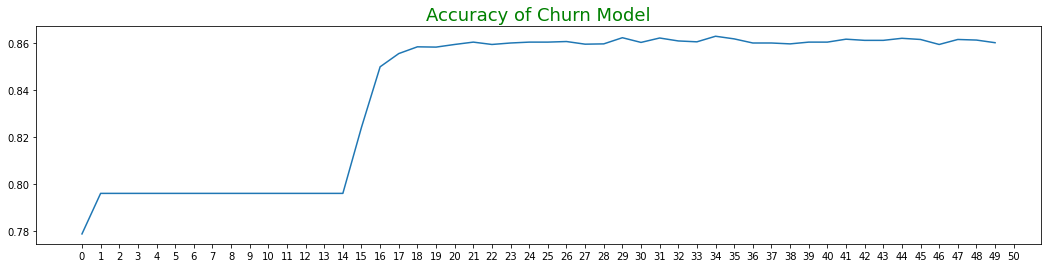

In [65]:
plt.figure(figsize=(18,4))
plt.plot(res.history['accuracy'], label='Accuracy')
plt.xticks(np.arange(0,51,1))
plt.title("Accuracy of Churn Model", fontsize=18, color='green');

**Accuracy is increasing after every Epoch, After 20 Epochs Accuracy is almost constant**

### Loss

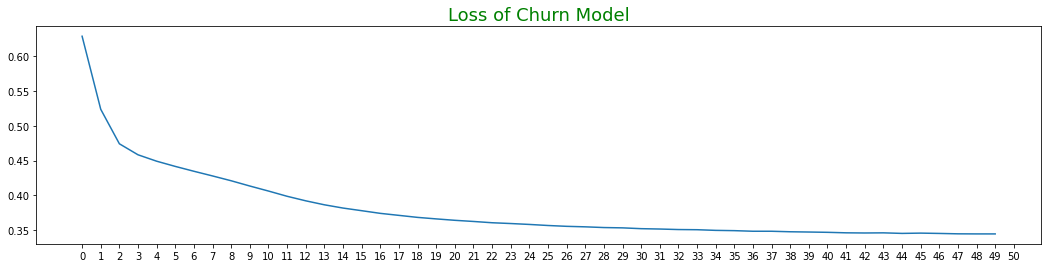

In [68]:
plt.figure(figsize=(18,4))
plt.plot(res.history['loss'], label='Loss')
plt.xticks(np.arange(0,51,1))
plt.title("Loss of Churn Model", fontsize=18, color='green');

**Loss is decreasing after each Epoch, after 20 epochs loss is almost constant and it is minimum.**

### Prediction

In [70]:
y_pred=model.predict(x_test)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.20446335],
       [0.27603805],
       [0.11877094],
       ...,
       [0.09837719],
       [0.09839114],
       [0.11962758]], dtype=float32)

**Predicted values are not exactly 0 and 1, hence convert those predicted values which are greater than 0.5 to 1.**

In [73]:
y_pred=np.where(y_pred>=.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_pred,y_test))
print('\n Out of {}, {} are missclassified'.format(y_test.shape[0], (y_test!=y_pred.flatten()).sum()))

[[1519  209]
 [  76  196]]

 Out of 2000, 285 are missclassified


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Accuracy is 86%
### Precision is 88%
### Recall score 95
### F1 score 91